In [72]:
import data_outcomes as data
import data_models

# Dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import datetime
import numpy as np
from scipy.stats import zscore
import scipy.stats as stats

In [74]:
df = data.getDiabetesDataDataframe()
display(df.head())

----> Retrieving information for Resources/diabetes.csv
----> Renaming DiabetesPedigreeFunction column to FamilyHistory
----> Mean will be substituted for 0 values
----> 121 substituted for 0 values in Glucose
----> 72 substituted for 0 values in BloodPressure
----> 29 substituted for 0 values in SkinThickness
----> 155 substituted for 0 values in Insulin
----> 32 substituted for 0 values in BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,FamilyHistory,Age,Outcome
0,6,148,72,35,155,33,0.627,50,1
1,1,85,66,29,155,26,0.351,31,0
2,8,183,64,29,155,23,0.672,32,1
3,1,89,66,23,94,28,0.167,21,0
4,0,137,40,35,168,43,2.288,33,1


In [76]:
dfb = data.getDiabetesBehaviorDataframe()
display(dfb.head())

----> Retrieving information for Resources/diabetes_data.csv


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
models = [
        LogisticRegression(random_state=42),
        KNeighborsClassifier(n_neighbors=27),
        GradientBoostingClassifier(random_state=42),
        AdaBoostClassifier(random_state=42)
    ]

dict = data_models.model_selector(dfb, models)

------------ Running predictions for LogisticRegression(random_state=42)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for KNeighborsClassifier(n_neighbors=27)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for GradientBoostingClassifier(random_state=42)  --------------------
Testing all features
Testing dropping features
Returning all features
------------ Running predictions for AdaBoostClassifier(random_state=42)  --------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing all features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Testing dropping features
Returning all features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [80]:
for mdl in dict:
    met = dict[mdl]
    for key in met:
        print(f'{key}: {met[key]}')

model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
train_score: 0.7604640661363715
test_score: 0.7601333750130249
test_metrics: {'model': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'accuracy': 0.7601333750130249, 'confusion_matrix': array([[3459, 1144],
       [1158, 3836]]), 'classification_report': '              precision    recall  f1-score   support\n\n           1       0.75      0.75      0.75      4603\n           0       0.77      0.77      0.77      4994\n\n    accuracy                           0.76      9597\n   macro avg       0.76      0.76      0.76      9597\nweighted avg       0.76      0.76      0.76      9597\n', 'balanced_accuracy_score': 0.7597940905145266}
model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
train_score: 0.7653270346312828
test_score: 0.7533604251328541
test_metrics: {'model': <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, 'accuracy': 0.7533604251328541, 'confusion_matrix': ar

In [82]:
# Split training and testing sets
# Create the features DataFrame, X
X = dfb.copy()
X = X.drop(columns=['Diabetes'])
y = dfb['Diabetes']

In [84]:
display(X.head())

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [86]:
#Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

# Generate predictions from the model we just fit
training_predictions = logistic_regression_model.predict(X_train_scaled)

# Convert those predictions (and actual values) to a DataFrame
training_results_df = pd.DataFrame({"Prediction": training_predictions, "Actual": y_train})

# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Save both the test predictions and actual test values to a DataFrame
testing_results = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

Training Data Score: 0.7596304143943867
Testing Data Score: 0.7630509534229447


In [90]:
#lr = sm.Logit(y_train, X_train_scaled).fit(method='bfgs')
#lr.pvalues.sort_values()
#lr.pvalues

In [92]:
accuracy = accuracy_score(y_test, testing_predictions)
confusion = confusion_matrix(y_test, testing_predictions, labels=[1,0])
classification = classification_report(y_test, testing_predictions, labels = [1, 0])
balanced_accuracy = balanced_accuracy_score(y_test, testing_predictions)
r2 = r2_score(y_test, testing_predictions)
cross_val = cross_val_score(LogisticRegression(), X_train_scaled, y_train, scoring = "r2")

In [94]:
# Provided code to create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)
adj_score = r2_adj(X_test_scaled, y_test, logistic_regression_model)

In [96]:
print(f'accuracy: {accuracy}')
print(f'confusion: {confusion}')
print(f'classification: {classification}')
print(f'balanced_accuracy: {balanced_accuracy}')
print(f'r2: {r2}')
print(f'r2_adj: {adj_score}')
print(f'cross_val: {cross_val}')

accuracy: 0.7630509534229447
confusion: [[3485 1076]
 [1198 3838]]
classification:               precision    recall  f1-score   support

           1       0.74      0.76      0.75      4561
           0       0.78      0.76      0.77      5036

    accuracy                           0.76      9597
   macro avg       0.76      0.76      0.76      9597
weighted avg       0.76      0.76      0.76      9597

balanced_accuracy: 0.7630998054960217
r2: 0.049876277776548905
r2_adj: 0.7626304362716961
cross_val: [0.04969722 0.02117423 0.02813106 0.04552313 0.02658294]


k: 1, Train/Test Score: 0.973/0.674
k: 3, Train/Test Score: 0.837/0.714
k: 5, Train/Test Score: 0.806/0.729
k: 7, Train/Test Score: 0.794/0.737
k: 9, Train/Test Score: 0.785/0.740
k: 11, Train/Test Score: 0.781/0.741
k: 13, Train/Test Score: 0.777/0.744
k: 15, Train/Test Score: 0.775/0.746
k: 17, Train/Test Score: 0.773/0.749
k: 19, Train/Test Score: 0.770/0.749
k: 21, Train/Test Score: 0.770/0.750
k: 23, Train/Test Score: 0.767/0.752
k: 25, Train/Test Score: 0.766/0.751
k: 27, Train/Test Score: 0.765/0.753
k: 29, Train/Test Score: 0.765/0.754


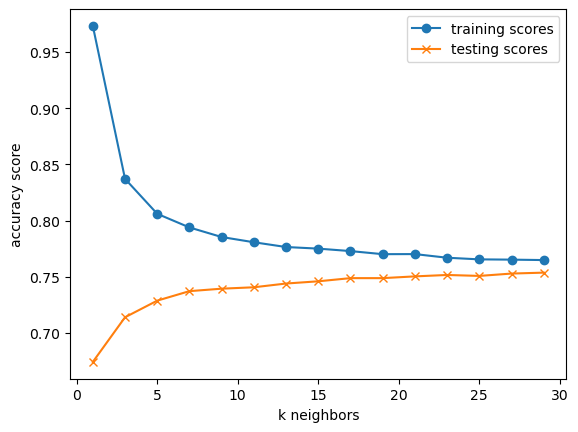

In [98]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [99]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
print('k=27 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=27 Test Acc: 0.753


In [100]:
# Train the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {gbc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gbc.score(X_test_scaled, y_test)}')

Training Score: 0.7688700545347181
Testing Score: 0.7623215588204647


In [104]:
# Train the AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {abc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {abc.score(X_test_scaled, y_test)}')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Score: 0.7619576921740943
Testing Score: 0.7630509534229447


In [ ]:
Data Spliting Follow Up

In [106]:
# Split training and testing sets
# Create the features DataFrame, X
X = dfb.copy()
X = X.drop(columns=['Diabetes'])
y = dfb['Diabetes']

In [108]:
display(X.head())

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [112]:
# Use train_test_split to separate the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(random_state=42)

In [118]:
# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [120]:
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7584668490295688
Testing Data Score: 0.7666058869497265


In [122]:
from sklearn.model_selection import GridSearchCV

In [124]:
# Define the hyperparameters grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [126]:
# Create a GridSearchCV object for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)

In [128]:
# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [130]:
# Get the best parameters and best score from the GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [132]:
# Print the best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.7583368555222754


In [134]:
# Use the best estimator from GridSearchCV to make predictions
best_estimator = grid_search.best_estimator_
testing_predictions_tuned = best_estimator.predict(X_test_scaled)

In [136]:
# Evaluate the model with tuned hyperparameters
accuracy_tuned = accuracy_score(y_test, testing_predictions_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned}')

Tuned Model Accuracy: 0.7666058869497265


k: 1, Train/Test Score: 0.972/0.678
k: 3, Train/Test Score: 0.838/0.709
k: 5, Train/Test Score: 0.804/0.730
k: 7, Train/Test Score: 0.792/0.745
k: 9, Train/Test Score: 0.785/0.746
k: 11, Train/Test Score: 0.780/0.746
k: 13, Train/Test Score: 0.777/0.750
k: 15, Train/Test Score: 0.774/0.751
k: 17, Train/Test Score: 0.773/0.751
k: 19, Train/Test Score: 0.770/0.753
k: 21, Train/Test Score: 0.769/0.754
k: 23, Train/Test Score: 0.768/0.758
k: 25, Train/Test Score: 0.766/0.755
k: 27, Train/Test Score: 0.765/0.758
k: 29, Train/Test Score: 0.764/0.758


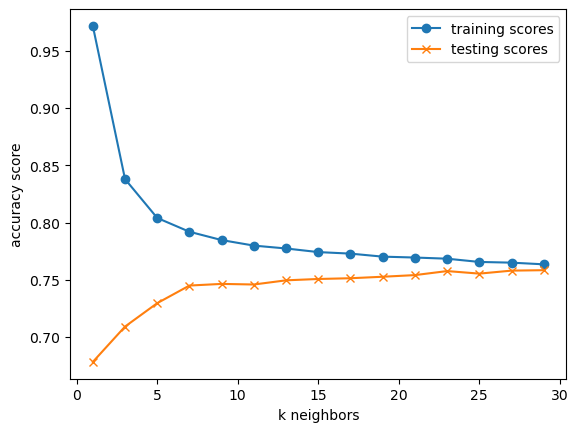

In [138]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [142]:
# Perform cross-validation for Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)
cross_val_scores = cross_val_score(logistic_regression_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [144]:
# Print cross-validation scores
print("Cross-Validation Scores:")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score}")

Cross-Validation Scores:
Fold 1: 0.7585477043308368
Fold 2: 0.7541517421035493
Fold 3: 0.7539889286877238
Fold 4: 0.7554144276176519
Fold 5: 0.769418661455789
